#1 Introdução:
  Análise dos dados da empresa BanVic com o objetivo de identificar melhorias para a eficiência da operação. Os dados transacionais são os pilares do estudo, com foco nas datas e tipos de transações realizadas. O objetivo é identificar quais foram os melhores períodos com base no padrão transacional.



[Indice IPCA](https://www.dadosdemercado.com.br/indices/ipca)

#2 Pacotes e Bibliotecas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

#3 Exploração de dados

In [ ]:
with open(file='/content/transacoes.csv', mode='r') as file:data = file.read()

In [ ]:
with open(file='/content/transacoes.csv', mode='r') as file:data = file.read()

In [ ]:
indice_limpo_df= pd.read_csv('/content/indice_limpo(1).csv')

In [ ]:
transacoes2_df = pd.read_csv('/content/transacoes.csv')

In [ ]:
transacoes_df.head()

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,2020-05-22 03:15:21 UTC,Saque,-130.0
1,28405,256,2021-06-29 11:52:38 UTC,Saque,-255.0
2,1776,512,2020-05-17 13:04:50 UTC,Saque,-250.0
3,14311,512,2020-09-06 02:55:34 UTC,Saque,-80.0
4,25012,512,2020-10-16 09:26:52 UTC,Saque,-475.0


In [ ]:
transacoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   cod_transacao    71999 non-null  int64              
 1   num_conta        71999 non-null  int64              
 2   data_transacao   58097 non-null  datetime64[ns, UTC]
 3   nome_transacao   71999 non-null  object             
 4   valor_transacao  71999 non-null  float64            
 5   ano              58097 non-null  float64            
 6   mes_ano          58097 non-null  object             
 7   mes_nome         58097 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(3)
memory usage: 4.4+ MB


#4 Manipuação

In [ ]:
transacoes_limpo_df = transacoes_df.drop(columns=['cod_transacao', 'nome_transacao'])
transacoes_limpo_df.head()

,num_conta,data_transacao,valor_transacao
0,256,2020-05-22 03:15:21 UTC,-130.0
1,256,2021-06-29 11:52:38 UTC,-255.0
2,512,2020-05-17 13:04:50 UTC,-250.0
3,512,2020-09-06 02:55:34 UTC,-80.0
4,512,2020-10-16 09:26:52 UTC,-475.0


In [ ]:
data_limpas_df = transacoes_df.copy()
data_limpas_df['data_transacao'] = pd.to_datetime(data_limpas_df['data_transacao'], errors='coerce').dt.tz_localize(None).dt.strftime('%d/%m/%Y')
data_limpas_df

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,22/05/2020,Saque,-130.0
1,28405,256,29/06/2021,Saque,-255.0
2,1776,512,17/05/2020,Saque,-250.0
3,14311,512,06/09/2020,Saque,-80.0
4,25012,512,16/10/2020,Saque,-475.0
...,...,...,...,...,...
71994,17007,764,NaN,Transferência entre CC - Crédito,82.3
71995,22320,764,NaN,Transferência entre CC - Crédito,414.8
71996,8697,509,07/05/2012,Transferência entre CC - Crédito,720.4
71997,11574,766,19/09/2015,Transferência entre CC - Crédito,1143.0


In [ ]:
data_limpas_df.dropna()

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,22/05/2020,Saque,-130.0
1,28405,256,29/06/2021,Saque,-255.0
2,1776,512,17/05/2020,Saque,-250.0
3,14311,512,06/09/2020,Saque,-80.0
4,25012,512,16/10/2020,Saque,-475.0
...,...,...,...,...,...
71991,8210,508,30/05/2019,Transferência entre CC - Crédito,690.6
71992,27335,508,05/12/2019,Transferência entre CC - Crédito,721.8
71993,63392,508,29/12/2022,Transferência entre CC - Crédito,478.8
71996,8697,509,07/05/2012,Transferência entre CC - Crédito,720.4


In [ ]:
transacoes_df['data_transacao'] = pd.to_datetime(transacoes_df['data_transacao'], errors='coerce')
transacoes_df['ano'] = transacoes_df['data_transacao'].dt.year
transacoes_df['mes_ano'] = transacoes_df['data_transacao'].dt.strftime('%m/%Y')
ano_df = transacoes_df[['ano']]
mes_ano_df = transacoes_df[['mes_ano']]
print("DataFrame com os anos (ano_df):")
ano_df

DataFrame com os anos (ano_df):


,ano
0,2020.0
1,2021.0
2,2020.0
3,2020.0
4,2020.0
...,...
71994,NaN
71995,NaN
71996,2012.0
71997,2015.0


In [ ]:
mes_ano_df


DataFrame com os meses e anos (mes_ano_df):


,mes_ano
0,05/2020
1,06/2021
2,05/2020
3,09/2020
4,10/2020
...,...
71994,NaN
71995,NaN
71996,05/2012
71997,09/2015


In [ ]:
ano_df.dropna()

,ano
0,2020.0
1,2021.0
2,2020.0
3,2020.0
4,2020.0
...,...
71991,2019.0
71992,2019.0
71993,2022.0
71996,2012.0


In [ ]:
ano_agrupado_df = transacoes_df.groupby('ano').size().reset_index(name='quantidade_transacoes/ano')
ano_agrupado_df

,ano,quantidade_transacoes/ano
0,2010.0,93
1,2011.0,367
2,2012.0,734
3,2013.0,1249
4,2014.0,1502
5,2015.0,1897
6,2016.0,2604
7,2017.0,3554
8,2018.0,3944
9,2019.0,5428


In [ ]:
mes_ano_df.dropna()

,mes_ano
0,05/2020
1,06/2021
2,05/2020
3,09/2020
4,10/2020
...,...
71991,05/2019
71992,12/2019
71993,12/2022
71996,05/2012


In [ ]:
mes_ano_df.to_csv('mes_ano_df.csv', index=False)
print("Gerado o arquivo .csv")

Gerado o arquivo .csv


In [ ]:
meses = {
    1: 'janeiro', 2: 'fevereiro', 3: 'março', 4: 'abril', 5: 'maio', 6: 'junho',
    7: 'julho', 8: 'agosto', 9: 'setembro', 10: 'outubro', 11: 'novembro', 12: 'dezembro'
}
transacoes_df['mes_nome'] = transacoes_df['data_transacao'].dt.month.map(meses) + '/' + transacoes_df['ano'].astype(str)
mes_agrupado_df = transacoes_df.groupby('mes_nome').size().reset_index(name='quantidade')
mes_agrupado_df

,mes_nome,quantidade
0,abril/2011.0,13
1,abril/2012.0,88
2,abril/2013.0,84
3,abril/2014.0,122
4,abril/2015.0,197
...,...,...
150,setembro/2018.0,262
151,setembro/2019.0,469
152,setembro/2020.0,456
153,setembro/2021.0,672


In [ ]:
mes_agrupado_df.to_csv('mes_agrupado_df.csv', index=False)
print('Gerado arquivo.csv')

Gerado arquivo.csv


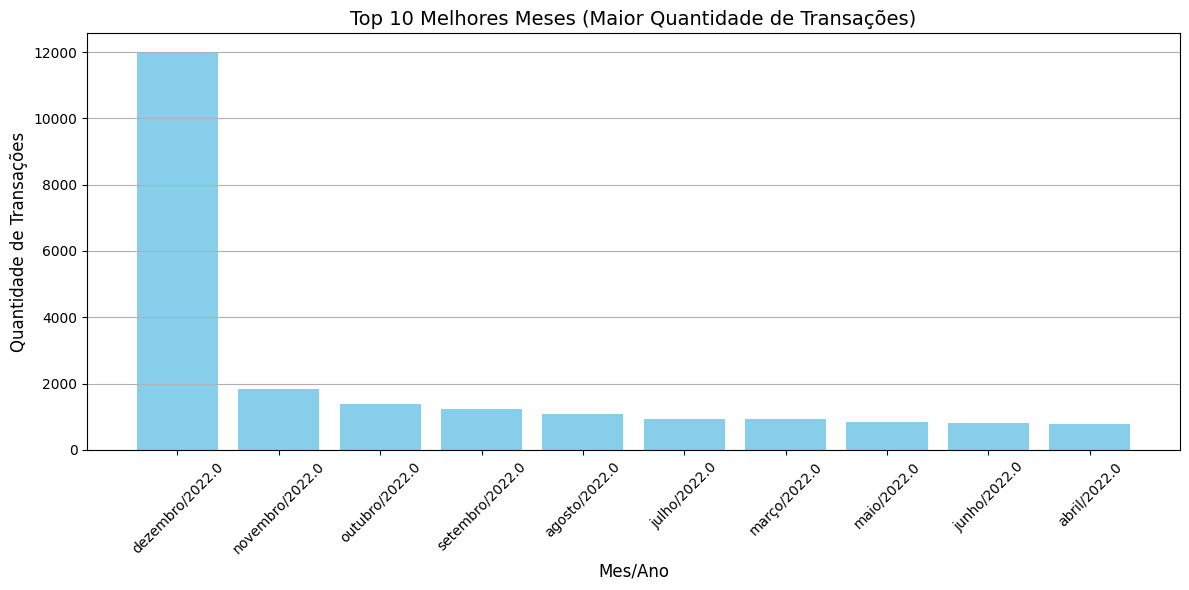

In [ ]:
mes_agrupado_df = mes_agrupado_df.sort_values(by='quantidade', ascending=False)
top_10_melhores = mes_agrupado_df.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_melhores['mes_nome'], top_10_melhores['quantidade'], color='skyblue')
plt.title('Top 10 Melhores Meses (Maior Quantidade de Transações)', fontsize=14)
plt.xlabel('Mes/Ano', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

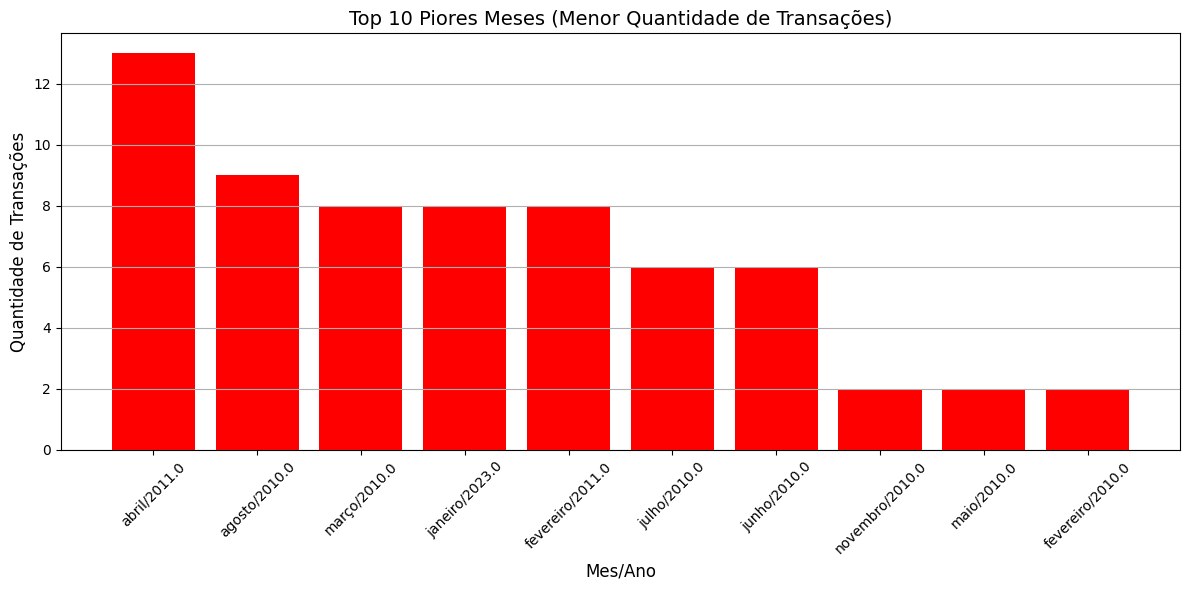

In [ ]:
top_10_piores = mes_agrupado_df.tail(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_piores['mes_nome'], top_10_piores['quantidade'], color='red')
plt.title('Top 10 Piores Meses (Menor Quantidade de Transações)', fontsize=14)
plt.xlabel('Mes/Ano', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

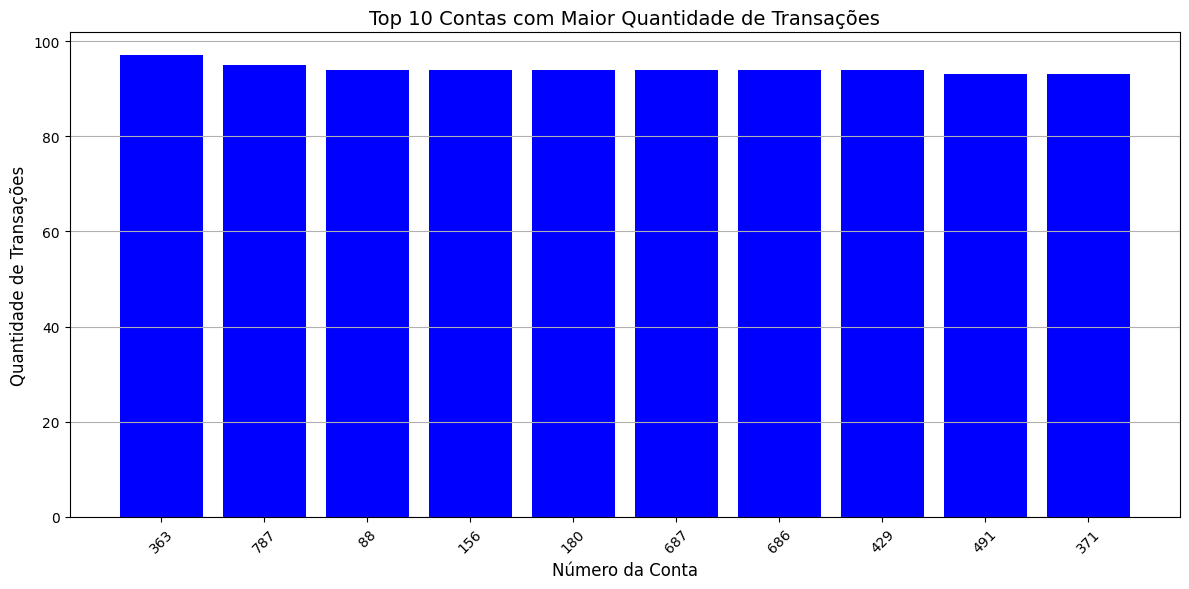

In [ ]:
transacoes_por_conta = transacoes_df.groupby('num_conta').size().reset_index(name='quantidade')
top_10_contas = transacoes_por_conta.sort_values(by='quantidade', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_contas['num_conta'].astype(str), top_10_contas['quantidade'], color='blue')
plt.title('Top 10 Contas com Maior Quantidade de Transações', fontsize=14)
plt.xlabel('Número da Conta', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

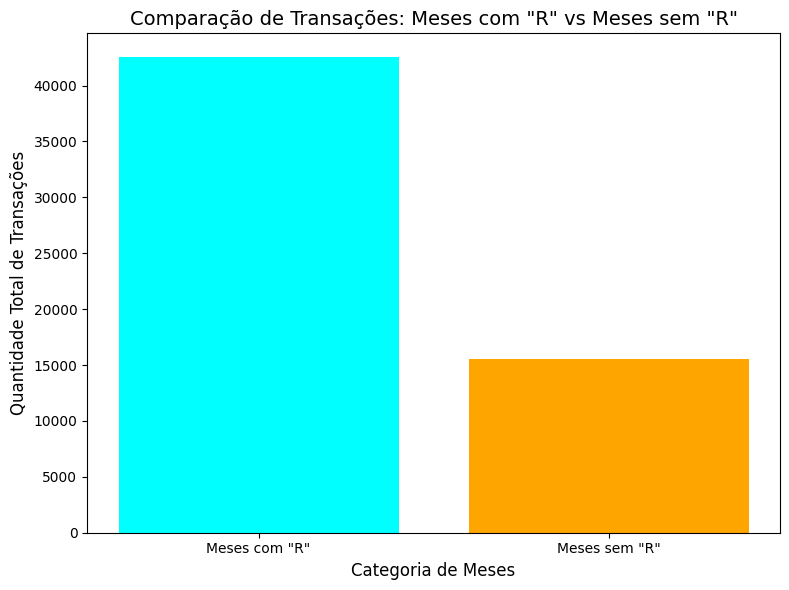

In [ ]:
meses_com_R = mes_agrupado_df[mes_agrupado_df['mes_nome'].str.contains('r', case=False)]
meses_sem_R = mes_agrupado_df[~mes_agrupado_df['mes_nome'].str.contains('r', case=False)]
quantidade_com_R = meses_com_R['quantidade'].sum()
quantidade_sem_R = meses_sem_R['quantidade'].sum()
labels = ['Meses com "R"', 'Meses sem "R"']
quantidades = [quantidade_com_R, quantidade_sem_R]
plt.figure(figsize=(8, 6))
plt.bar(labels, quantidades, color=['cyan', 'orange'])
plt.title('Comparação de Transações: Meses com "R" vs Meses sem "R"', fontsize=14)
plt.ylabel('Quantidade Total de Transações', fontsize=12)
plt.xlabel('Categoria de Meses', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
contagem_com_R = meses_com_R['mes_nome'].nunique()
contagem_sem_R = meses_sem_R['mes_nome'].nunique()
contador_meses_df = pd.DataFrame({
    'Categoria': ['Meses com "R"', 'Meses sem "R"'],
    'Contagem Absoluta': [contagem_com_R, contagem_sem_R]
})
contador_meses_df

,Categoria,Contagem Absoluta
0,"Meses com ""R""",103
1,"Meses sem ""R""",52


In [ ]:
valor_com_R = meses_com_R['quantidade'].sum()
valor_sem_R = meses_sem_R['quantidade'].sum()
valor_transacoes_df = pd.DataFrame({
    'Categoria': ['Meses com "R"', 'Meses sem "R"'],
    'Valor Absoluto das Transações': [valor_com_R, valor_sem_R]
})
total_df = pd.DataFrame({
    'Categoria': ['Total'],
    'Valor Absoluto das Transações': [valor_com_R + valor_sem_R]
})
valor_transacoes_df

,Categoria,Valor Absoluto das Transações
0,"Meses com ""R""",42539
1,"Meses sem ""R""",15558


In [ ]:
porcentagem_com_R_df = (valor_com_R / (valor_com_R + valor_sem_R)) * 100
porcentagem_sem_R_df = (valor_sem_R / (valor_com_R + valor_sem_R)) * 100

In [ ]:
porcentagem_com_R_df

73.22064822624232

In [ ]:
porcentagem_sem_R_df

26.779351773757682

In [ ]:
total_df

,Categoria,Valor Absoluto das Transações
0,Total,58097


In [ ]:
quantidade_transacoes_df = transacoes2_df.groupby('nome_transacao').size().reset_index(name='quantidade')
quantidade_transacoes_df

,nome_transacao,quantidade
0,Compra Crédito,24977
1,Compra Débito,17662
2,DOC - Realizado,91
3,DOC - Recebido,402
4,Depósito em espécie,4866
5,Estorno de Debito,403
6,Pagamento de boleto,452
7,Pix - Realizado,13164
8,Pix - Recebido,5134
9,Pix Saque,90


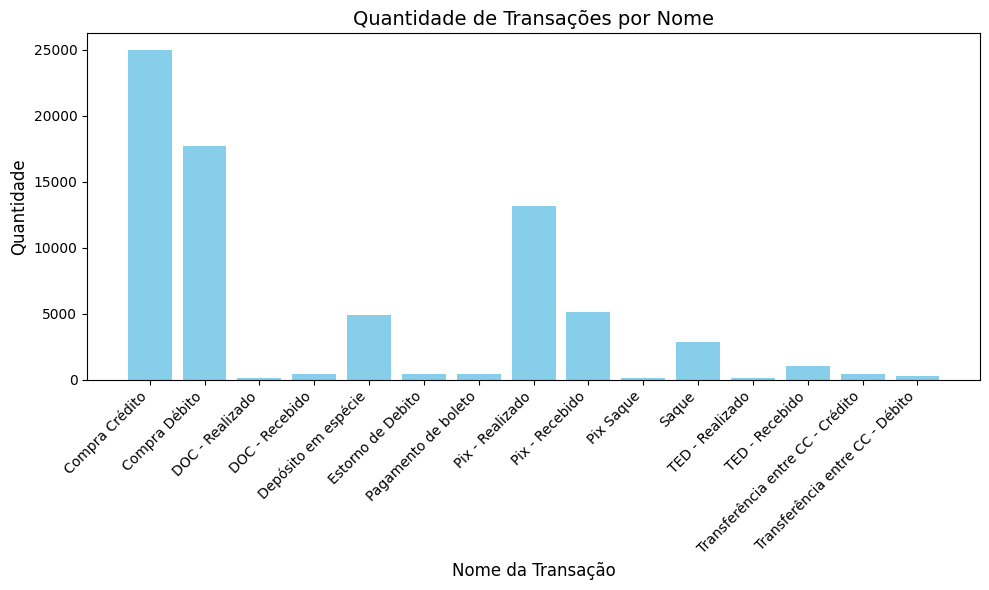

In [ ]:
quantidade_transacoes_df = transacoes2_df.groupby('nome_transacao').size().reset_index(name='quantidade')
plt.figure(figsize=(10, 6))
plt.bar(quantidade_transacoes_df['nome_transacao'], quantidade_transacoes_df['quantidade'], color='skyblue')
plt.title('Quantidade de Transações por Nome', fontsize=14)
plt.xlabel('Nome da Transação', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
transacoes_df['data_transacao'] = pd.to_datetime(transacoes_df['data_transacao'])
dim_dates = pd.DataFrame()
dim_dates['data_transacao'] = transacoes_df['data_transacao']
dim_dates['ano'] = dim_dates['data_transacao'].dt.year
dim_dates['mes'] = dim_dates['data_transacao'].dt.month
dim_dates['trimestre'] = dim_dates['data_transacao'].dt.to_period('Q')
dim_dates['nome_mes'] = dim_dates['data_transacao'].dt.strftime('%B')
dim_dates['nome_dia'] = dim_dates['data_transacao'].dt.day_name()
dim_dates['dia_semana'] = dim_dates['data_transacao'].dt.weekday
dim_dates.head()

<ipython-input-24-9ab9b977d277>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dim_dates['trimestre'] = dim_dates['data_transacao'].dt.to_period('Q')


,data_transacao,ano,mes,trimestre,nome_mes,nome_dia,dia_semana
0,2020-05-22 03:15:21+00:00,2020.0,5.0,2020Q2,May,Friday,4.0
1,2021-06-29 11:52:38+00:00,2021.0,6.0,2021Q2,June,Tuesday,1.0
2,2020-05-17 13:04:50+00:00,2020.0,5.0,2020Q2,May,Sunday,6.0
3,2020-09-06 02:55:34+00:00,2020.0,9.0,2020Q3,September,Sunday,6.0
4,2020-10-16 09:26:52+00:00,2020.0,10.0,2020Q4,October,Friday,4.0


In [ ]:
dim_dates.to_csv('dim_dates.csv', index=False)
print("Gerado o arquivo .csv")

Gerado o arquivo .csv


<ipython-input-25-a1cd45d66da1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transacoes_ano.index, y=transacoes_ano.values, palette='pastel')


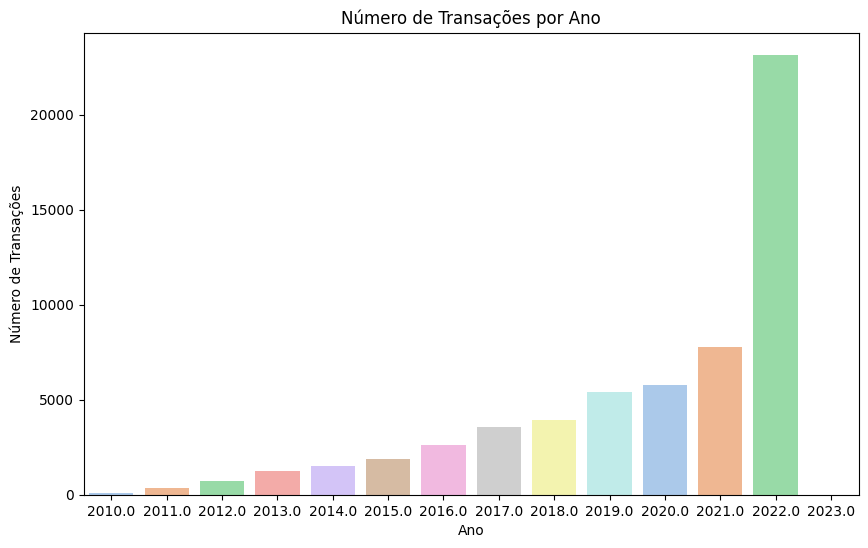

In [ ]:
transacoes_ano = dim_dates['ano'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=transacoes_ano.index, y=transacoes_ano.values, palette='pastel')
plt.title('Número de Transações por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Transações')
plt.show()

<ipython-input-26-197cd37ce235>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transacoes_mes.index, y=transacoes_mes.values, palette='pastel')


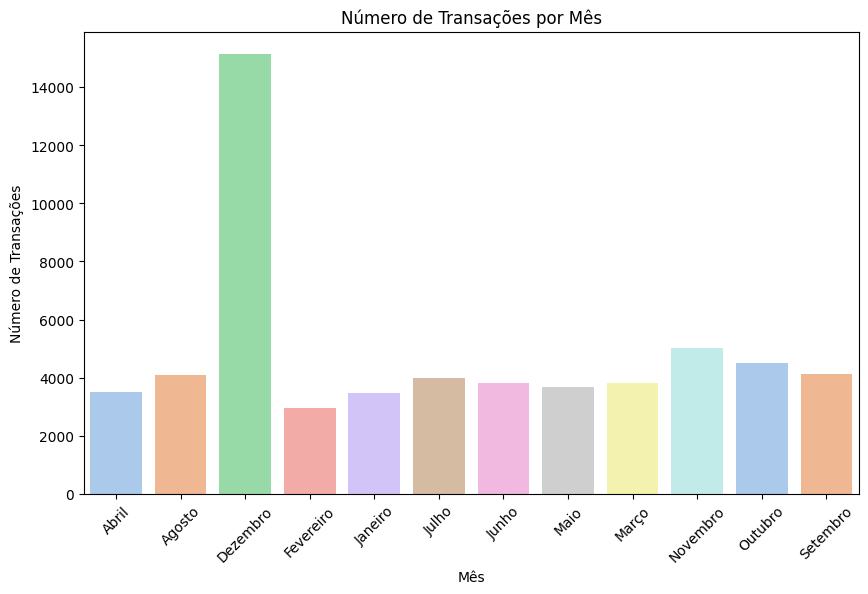

In [ ]:
meses_ptbr = {
    'January': 'Janeiro',
    'February': 'Fevereiro',
    'March': 'Março',
    'April': 'Abril',
    'May': 'Maio',
    'June': 'Junho',
    'July': 'Julho',
    'August': 'Agosto',
    'September': 'Setembro',
    'October': 'Outubro',
    'November': 'Novembro',
    'December': 'Dezembro'
}
dim_dates['nome_mes_ptbr'] = dim_dates['nome_mes'].map(meses_ptbr)
transacoes_mes = dim_dates['nome_mes_ptbr'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=transacoes_mes.index, y=transacoes_mes.values, palette='pastel')
plt.title('Número de Transações por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Transações')
plt.xticks(rotation=45)
plt.show()

<ipython-input-47-44bc6da4da6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_trimestres.index.astype(str), y=top_10_trimestres.values, palette='pastel')


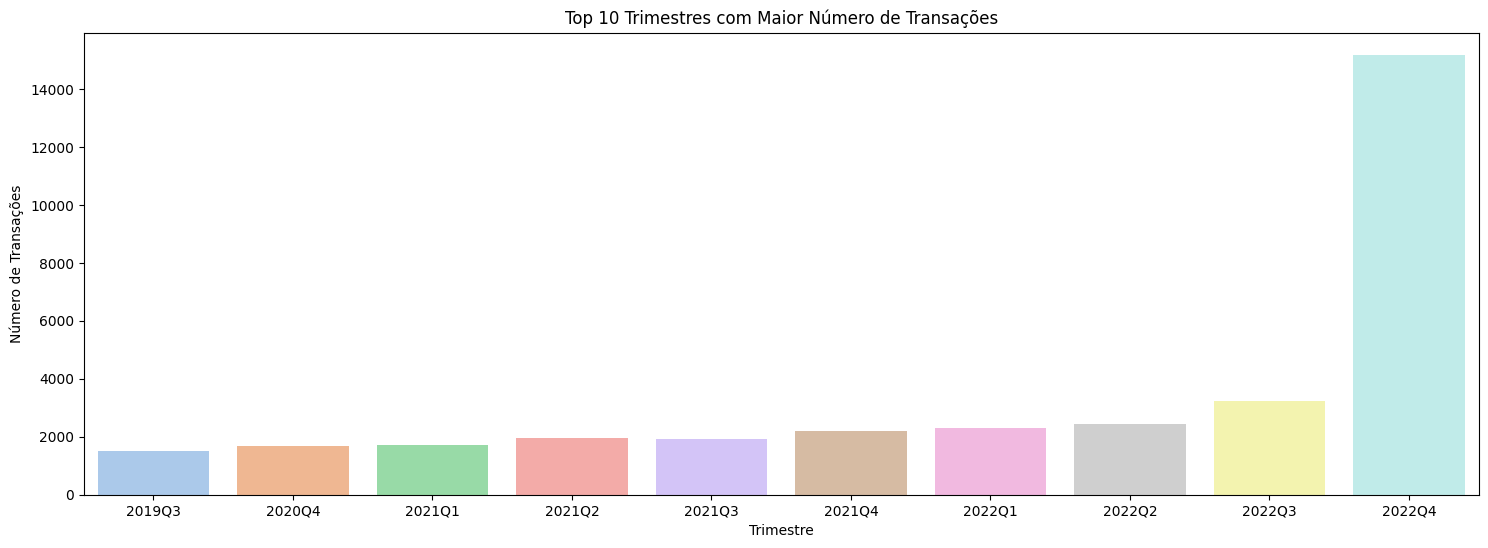

In [ ]:
top_10_trimestres = dim_dates['trimestre'].value_counts().nlargest(10).sort_index()
plt.figure(figsize=(18, 6))
sns.barplot(x=top_10_trimestres.index.astype(str), y=top_10_trimestres.values, palette='pastel')
plt.title('Top 10 Trimestres com Maior Número de Transações')
plt.xlabel('Trimestre')
plt.ylabel('Número de Transações')
plt.show()

In [ ]:
transacoes_trimestre_df = (dim_dates.groupby('trimestre').size().reset_index(name='quantidade').nlargest(10, 'quantidade'))
transacoes_trimestre_df.head(10)

,trimestre,quantidade
51,2022Q4,15184
50,2022Q3,3240
49,2022Q2,2424
48,2022Q1,2310
47,2021Q4,2196
45,2021Q2,1945
46,2021Q3,1925
44,2021Q1,1710
43,2020Q4,1676
38,2019Q3,1495


In [ ]:
transacoes_trimestre_df.to_csv('transacoes_trimestre.csv', index=False)
print("Gerado o arquivo .csv")

Gerado o arquivo .csv


<ipython-input-62-e7e0d18bf8fe>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transacoes_dia_semana.index, y=transacoes_dia_semana.values, palette='pastel')


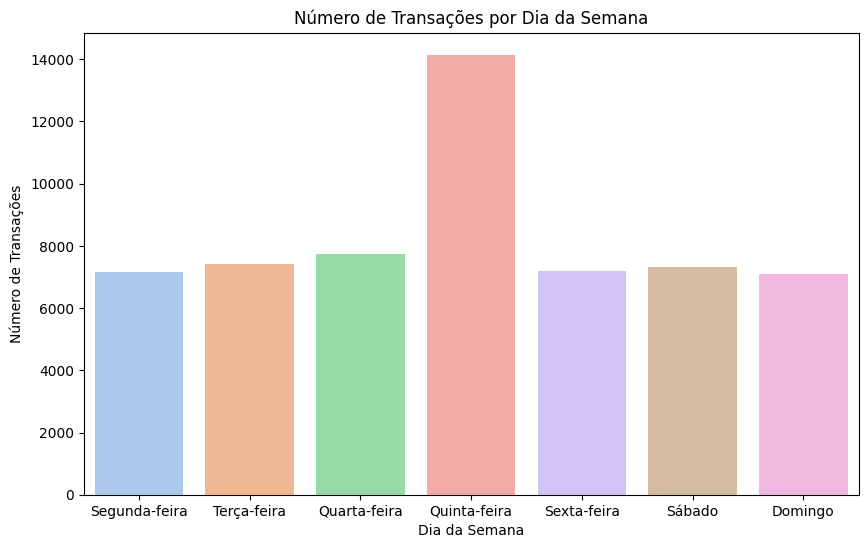

In [ ]:
dias_semana_ptbr = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
dim_dates['nome_dia_ptbr'] = dim_dates['nome_dia'].map(dias_semana_ptbr)
transacoes_dia_semana = dim_dates['nome_dia_ptbr'].value_counts().reindex(
    ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
)
plt.figure(figsize=(10, 6))
sns.barplot(x=transacoes_dia_semana.index, y=transacoes_dia_semana.values, palette='pastel')
plt.title('Número de Transações por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Transações')
plt.show()

In [ ]:
transacoes_dia_semana_df = (dim_dates.groupby('nome_dia_ptbr').size().reset_index(name='quantidade').nlargest(10, 'quantidade'))
transacoes_dia_semana_df.head(10)

,nome_dia_ptbr,quantidade
2,Quinta-feira,14147
1,Quarta-feira,7740
6,Terça-feira,7429
5,Sábado,7308
4,Sexta-feira,7201
3,Segunda-feira,7176
0,Domingo,7096


In [ ]:
transacoes_dia_semana_df.to_csv('transacoes_dia_semana.csv', index=False)
print("Gerado o transacoes_dia_semana.csv")

Gerado o transacoes_dia_semana.csv


In [ ]:
indice_limpo_df

,Ano,Porcentagem
0,2024,"4,83%"
1,2023,"4,62%"
2,2022,"5,78%"
3,2021,"10,06%"
4,2020,"4,52%"
5,2019,"4,31%"
6,2018,"3,75%"
7,2017,"2,95%"
8,2016,"6,29%"
9,2015,"10,67%"


In [ ]:
print(indice_limpo_df.dtypes)

Ano             int64
Porcentagem    object
dtype: object


In [ ]:
indice_limpo_df['Porcentagem'] = indice_limpo_df['Porcentagem'].replace({'%': '', ',': '.'}, regex=True)
indice_limpo_df['Porcentagem'] = pd.to_numeric(indice_limpo_df['Porcentagem'], errors='coerce').fillna(0).astype(int)

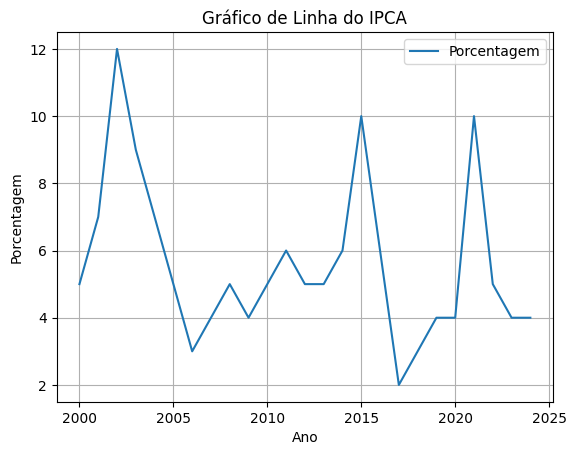

In [ ]:
indice_limpo_df.plot(x='Ano', y='Porcentagem', kind='line', title='Gráfico de Linha do IPCA')
plt.xlabel('Ano')
plt.ylabel('Porcentagem')
plt.grid(True)
plt.show()

#5 KPI'S


Período transacional: Foi escolhido porque, ao analisar um determinado período dos dados, pode-se concluir que em 2022 houve um aumento exponencial de transações, mesmo após a pandemia de 2020-2021.

Tipos de transação: Ao analisar os tipos de transação, pode-se concluir que as compras realizadas no crédito foram a grande maioria, indicando uma necessidade populacional de realizar esse tipo de compra, seja por não ter o dinheiro disponível no momento ou pelos benefícios que o cartão pode oferecer.





#6 Insights
1:
Ao analisar os gráficos gerados, conclui-se que o mês de dezembro é o que mais movimenta as vendas, independentemente do ano. Isso alavanca o último trimestre, colocando-o em primeiro lugar em termos de transações realizadas. Portanto, oferecer melhores condições para pagamento de dívidas ou parcelamentos no primeiro trimestre do ano seguinte pode ser uma das melhores formas de fidelizar esse tipo de cliente, ou até mesmo de recuperar o poder de compra de um determinado nicho.

2:
O dia da semana que mais movimenta transações é a quinta-feira, o que confirma um padrão de consumo mais alto do meio para o final da semana. Com isso em vista, entender como um indivíduo gasta seu dinheiro em qualquer tipo de transação é uma estratégia importante para os meses de menor fluxo.
Por exemplo, se o padrão comportamental de um nicho de mercado indica que há maiores probabilidades de vendas na quinta-feira, compreender o motivo por trás disso pode permitir que esse padrão seja replicado em outros dias da semana.

3:
Meses com a letra "R" apresentam um percentual de transações de 73,23%, contra 26,77% nos meses sem essa letra. Considerando que há apenas quatro meses que não possuem a letra "R" em seus nomes e que dezembro é o mês com o maior número de transações, esse dado não tem muita utilidade. Esses meses coincidem com a baixa temporada e férias escolares menores. Pode-se concluir que não há uma diferenciação significativa nas transações entre esses meses, exceto por dezembro, que é um período de festas, 13º salário e maior período de férias.

4:
Com o IPCA e a análise gráfica, pode-se concluir que, nos anos com o IPCA em alta, o consumidor freou seu padrão de consumo. O cenário econômico foi um desastre, com a volta da CPMF, problemas envolvendo o poder executivo e legislativo do país, que também culminaram na piora do poder de compra do cidadão.